In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# data file import
df_fire = pd.read_csv(r"data\fires.csv", sep=None, engine="python", index_col=0, dtype={"DISCOVERY_TIME": str, "CONT_TIME": str, "FIPS_CODE": str})

df_fire.head()

,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
OBJECTID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,NaN,NaN,NaN,NaN,NaN,2005,2453403.5,33,1300,9.0,Miscellaneous,2453403.5,33.0,1730,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,13,AAC0,PIGEON,NaN,NaN,NaN,NaN,NaN,2004,2453137.5,133,0845,1.0,Lightning,2453137.5,133.0,1530,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,27,021,A32W,SLACK,NaN,NaN,NaN,NaN,NaN,2004,2453156.5,152,1921,5.0,Debris Burning,2453156.5,152.0,2024,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,43,6,NaN,DEER,NaN,NaN,NaN,NaN,NaN,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1400,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,44,7,NaN,STEVENOT,NaN,NaN,NaN,NaN,NaN,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1200,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


COLUMNS RENAMING

In [4]:
# columns renaming
column_name_mapping = {
    "FOD_ID": "fod_id",
    "FPA_ID": "fpa_id",
    "SOURCE_SYSTEM_TYPE": "source_system_type",
    "SOURCE_SYSTEM": "source_system",
    "NWCG_REPORTING_AGENCY": "nwcg_reporting_agency",
    "NWCG_REPORTING_UNIT_ID": "nwcg_reporting_unit_id",
    "NWCG_REPORTING_UNIT_NAME": "nwcg_reporting_unit_name",
    "SOURCE_REPORTING_UNIT": "source_reporting_unit",
    "SOURCE_REPORTING_UNIT_NAME": "source_reporting_unit_name",
    "LOCAL_FIRE_REPORT_ID": "local_fire_report_id",
    "LOCAL_INCIDENT_ID": "local_incident_id",
    "FIRE_CODE": "fire_code",
    "FIRE_NAME": "fire_name",
    "ICS_209_INCIDENT_NUMBER": "ics_209_incident_number",
    "ICS_209_NAME": "ics_209_name",
    "MTBS_ID": "mtbs_id",
    "MTBS_FIRE_NAME": "mtbs_fire_name",
    "COMPLEX_NAME": "complex_name",
    "FIRE_YEAR": "fire_year",
    "DISCOVERY_DATE": "discovery_date",
    "DISCOVERY_DOY": "discovery_doy",
    "DISCOVERY_TIME": "discovery_time",
    "STAT_CAUSE_CODE": "stat_cause_code",
    "STAT_CAUSE_DESCR": "stat_cause_descr",
    "CONT_DATE": "cont_date",
    "CONT_DOY": "cont_doy",
    "CONT_TIME": "cont_time",
    "FIRE_SIZE": "fire_size",
    "FIRE_SIZE_CLASS": "fire_size_class",
    "LATITUDE": "latitude",
    "LONGITUDE": "longitude",
    "OWNER_CODE": "owner_code",
    "OWNER_DESCR": "owner_descr",
    "STATE": "state",
    "COUNTY": "county",
    "FIPS_CODE": "fips_code",
    "FIPS_NAME": "fips_name",
    "Shape": "shape"
}

df_fire.rename(column_name_mapping, axis=1, inplace=True)

COLUMNS TYPE CHANGING

In [5]:
# columns type changing
for column in df_fire.columns:
    print(f"column '{column}'")
    print(f"     # of unique values: {len(df_fire[column].unique())}")
    print(f"     type of column: {df_fire[column].dtypes}")

column 'fod_id'
     # of unique values: 1880465
     type of column: int64
column 'fpa_id'
     # of unique values: 1880462
     type of column: object
column 'source_system_type'
     # of unique values: 3
     type of column: object
column 'source_system'
     # of unique values: 38
     type of column: object
column 'nwcg_reporting_agency'
     # of unique values: 11
     type of column: object
column 'nwcg_reporting_unit_id'
     # of unique values: 1640
     type of column: object
column 'nwcg_reporting_unit_name'
     # of unique values: 1635
     type of column: object
column 'source_reporting_unit'
     # of unique values: 4992
     type of column: object
column 'source_reporting_unit_name'
     # of unique values: 4441
     type of column: object
column 'local_fire_report_id'
     # of unique values: 13509
     type of column: object
column 'local_incident_id'
     # of unique values: 565915
     type of column: object
column 'fire_code'
     # of unique values: 172444
     t

In [6]:
# fod_id                ==> object
df_fire["fod_id"] = df_fire["fod_id"].astype("object")

# source_system_type    ==> category
df_fire["source_system_type"] = df_fire["source_system_type"].astype("category")

# source_system         ==> category
df_fire["source_system"] = df_fire["source_system"].astype("category")

# nwcg_reporting_agency ==> category
df_fire["nwcg_reporting_agency"] = df_fire["nwcg_reporting_agency"].astype("category")

# discovery_date        ==> date
epoch = pd.to_datetime(0, unit='s').to_julian_date()
df_fire["discovery_date"] = pd.to_datetime(df_fire["discovery_date"] - epoch, unit="D")

# discovery_time        ==> time
# df_fire["discovery_time"] = pd.to_datetime(df_fire["discovery_time"], format="%H%M").dt.time
# We let this column as it is because we will create a new column containing the timestamp of the discovery

# stat_cause_code       ==> category (remove the .0 at the end)
df_fire["stat_cause_code"] = df_fire["stat_cause_code"].astype("int").astype("category")

# stat_cause_descr      ==> category
df_fire["stat_cause_descr"] = df_fire["stat_cause_descr"].astype("category")

# cont_date             ==> date
df_fire["cont_date"] = pd.to_datetime(df_fire["cont_date"] - epoch, unit='D')

# cont_doy              ==> int
# df_fire["cont_doy"] = df_fire["cont_doy"].astype("int")
# we have to manage NaN values first

# cont_time             ==> time
# df_fire["cont_time"] = pd.to_datetime(df_fire["cont_time"], format="%H%M").dt.time
# We let this column as it is because we will create a new column containing the timestamp of the cont

# fire_size_class       ==> category
df_fire["fire_size_class"] = df_fire["fire_size_class"].astype("category")

# owner_code            ==> category (remove the .0 at the end)
df_fire["owner_code"] = df_fire["owner_code"].astype("int").astype("category")

# owner_descr           ==> category
df_fire["owner_descr"] = df_fire["owner_descr"].astype("category")

# state                 ==> category
df_fire["state"] = df_fire["state"].astype("category")

In [7]:
df_fire.head()

,fod_id,fpa_id,source_system_type,source_system,nwcg_reporting_agency,nwcg_reporting_unit_id,nwcg_reporting_unit_name,source_reporting_unit,source_reporting_unit_name,local_fire_report_id,local_incident_id,fire_code,fire_name,ics_209_incident_number,ics_209_name,mtbs_id,mtbs_fire_name,complex_name,fire_year,discovery_date,discovery_doy,discovery_time,stat_cause_code,stat_cause_descr,cont_date,cont_doy,cont_time,fire_size,fire_size_class,latitude,longitude,owner_code,owner_descr,state,county,fips_code,fips_name,shape
OBJECTID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,NaN,NaN,NaN,NaN,NaN,2005,2005-02-02,33,1300,9,Miscellaneous,2005-02-02,33.0,1730,0.10,A,40.036944,-121.005833,5,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,13,AAC0,PIGEON,NaN,NaN,NaN,NaN,NaN,2004,2004-05-12,133,0845,1,Lightning,2004-05-12,133.0,1530,0.25,A,38.933056,-120.404444,5,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,27,021,A32W,SLACK,NaN,NaN,NaN,NaN,NaN,2004,2004-05-31,152,1921,5,Debris Burning,2004-05-31,152.0,2024,0.10,A,38.984167,-120.735556,13,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,43,6,NaN,DEER,NaN,NaN,NaN,NaN,NaN,2004,2004-06-28,180,1600,1,Lightning,2004-07-03,185.0,1400,0.10,A,38.559167,-119.913333,5,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,44,7,NaN,STEVENOT,NaN,NaN,NaN,NaN,NaN,2004,2004-06-28,180,1600,1,Lightning,2004-07-03,185.0,1200,0.10,A,38.559167,-119.933056,5,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


MISSING VALUES MANAGING

In [8]:
missing_value_column = df_fire.isna().sum(axis=0)

missing_value_column[missing_value_column != 0]

local_fire_report_id       1459286
local_incident_id           820821
fire_code                  1555741
fire_name                   960479
ics_209_incident_number    1854748
ics_209_name               1854749
mtbs_id                    1869462
mtbs_fire_name             1869462
complex_name               1875282
discovery_time              882638
cont_date                   891531
cont_doy                    891531
cont_time                   972553
county                      678148
fips_code                   678148
fips_name                   678148
dtype: int64

For id/code columns, we let NaN value. These columns are of type object and there is no way to replace the missing value by a proper value.

It concerns columns: 
* local_fire_report_id
* local_incident_id
* fire_code
* ics_209_incident_number
* mtbs_id
* fips_code

Furthermore, the same principle is applied to name columns:
* fire_name
* ics_209_name
* mtbs_fire_name
* complex_name
* county
* fips_name

For discovery_time columns, we will replace the missing values by 00:00:00 and put the result directly in the discovery_timestamp column

For cont_date, cont_doy and cont_time columns, see below the analysis

In [9]:
# creation of the column discovery_timestamp
def discovery_timestamp_creator(row):
    return row["discovery_date"] + row["discovery_timedelta"] 

In [10]:
df_fire["discovery_time_c"] = df_fire["discovery_time"].fillna("0000").astype(int)
df_fire["discovery_timedelta"] = pd.to_timedelta((df_fire["discovery_time_c"] // 100) * 60 + df_fire["discovery_time_c"] % 100, unit="minute")

In [11]:
# creation of the column discovery_timestamp (including the defaulting of discovery_time to 00:00:00)
df_fire["discovery_timestamp"] = df_fire[["discovery_date", "discovery_timedelta"]].apply(discovery_timestamp_creator, axis=1)

In [12]:
# creation of the column cont_timestamp
def cont_timestamp_creator(row):
    return row["cont_date"] + row["cont_timedelta"] 

In [13]:
df_fire["cont_time_c"] = df_fire["cont_time"].fillna("0000").astype(int)
df_fire["cont_timedelta"] = pd.to_timedelta((df_fire["cont_time_c"] // 100) * 60 + df_fire["cont_time_c"] % 100, unit="minute")

In [14]:
# creation of the column cont_timestamp (including the defaulting of cont_time to 00:00:00, but not the one concerning cont_date)
df_fire["cont_timestamp"] = df_fire[["cont_date", "cont_timedelta"]].apply(cont_timestamp_creator, axis=1)

In [15]:
# creation of the column fire_duration which is the substraction of the cont_timestamp and the discovery_timestamp
df_fire["fire_duration"] = df_fire["cont_timestamp"] - df_fire["discovery_timestamp"]

In [16]:
df_fire["fire_duration_min"] = df_fire["fire_duration"] / pd.Timedelta(minutes=1)

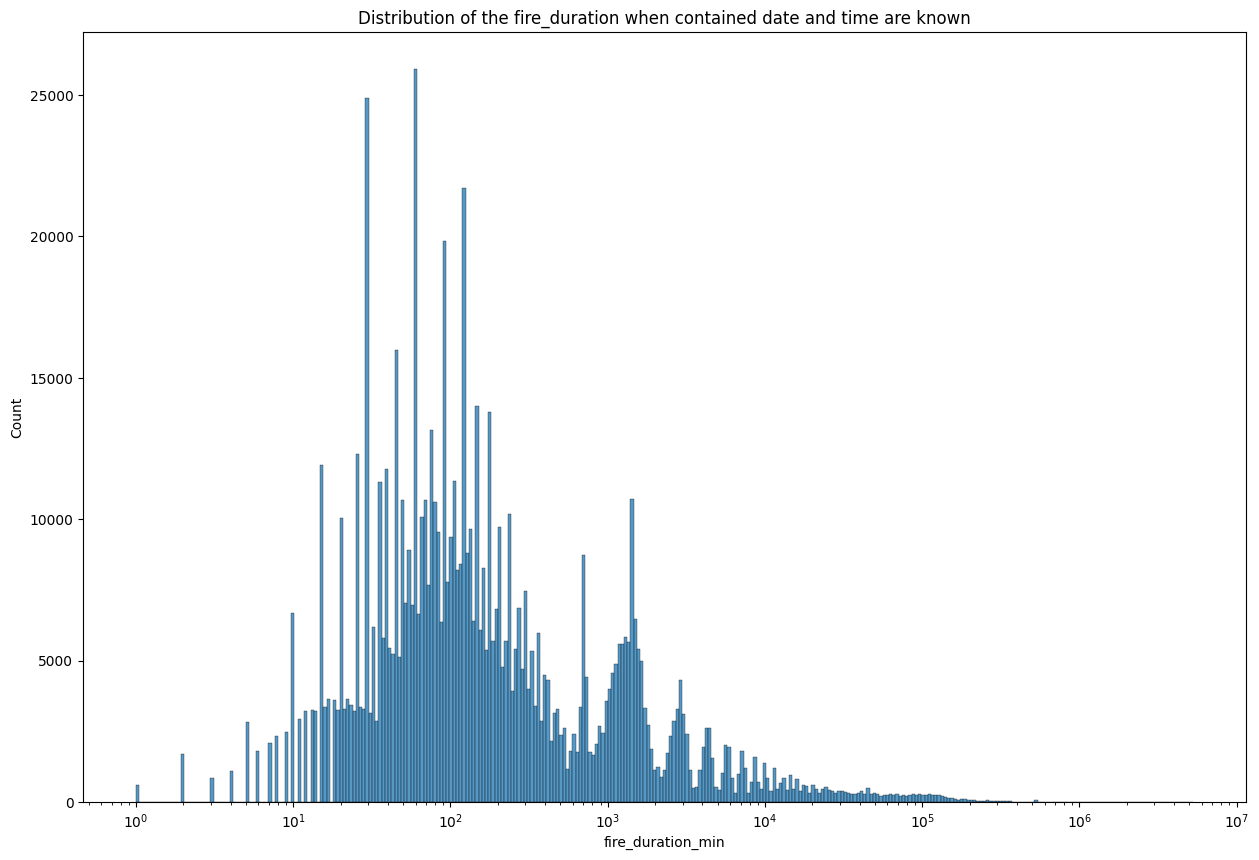

In [18]:
# distribution of the difference between discovery_date and cont_date
plt.figure(figsize=(15, 10))

sns.histplot(data=df_fire[-(df_fire["cont_time"].isna())], x="fire_duration_min", log_scale=True)

plt.title("Distribution of the fire_duration when contained date and time are known")

plt.show()

In [22]:
# due to the concentration of fire_duration to the low value, we will consider the median as a proper value to replace the missing values if cont_date is not filled
# median of the fire duration
fire_duration_median = df_fire["fire_duration"].median()

def cont_timestamp_defaulted_creator(row):
    if str(row["cont_time"]) == "nan":
        if str(row["cont_date"]) == "NaT":
            return row["discovery_timestamp"] + fire_duration_median
        else:
            return row["cont_date"]
    else:
        return cont_timestamp_creator(row)

# we apply this median to fill the missing values on cont_timestamp
df_fire["cont_timestamp"] = df_fire.apply(cont_timestamp_defaulted_creator, axis=1)

In [23]:
df_fire.head()

,fod_id,fpa_id,source_system_type,source_system,nwcg_reporting_agency,nwcg_reporting_unit_id,nwcg_reporting_unit_name,source_reporting_unit,source_reporting_unit_name,local_fire_report_id,local_incident_id,fire_code,fire_name,ics_209_incident_number,ics_209_name,mtbs_id,mtbs_fire_name,complex_name,fire_year,discovery_date,discovery_doy,discovery_time,stat_cause_code,stat_cause_descr,cont_date,cont_doy,cont_time,fire_size,fire_size_class,latitude,longitude,owner_code,owner_descr,state,county,fips_code,fips_name,shape,discovery_time_c,discovery_timedelta,discovery_timestamp,cont_time_c,cont_timedelta,cont_timestamp,fire_duration,fire_duration_min
OBJECTID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,NaN,NaN,NaN,NaN,NaN,2005,2005-02-02,33,1300,9,Miscellaneous,2005-02-02,33.0,1730,0.10,A,40.036944,-121.005833,5,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...,1300,0 days 13:00:00,2005-02-02 13:00:00,1730,0 days 17:30:00,2005-02-02 17:30:00,0 days 04:30:00,270.0
2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,13,AAC0,PIGEON,NaN,NaN,NaN,NaN,NaN,2004,2004-05-12,133,0845,1,Lightning,2004-05-12,133.0,1530,0.25,A,38.933056,-120.404444,5,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...,845,0 days 08:45:00,2004-05-12 08:45:00,1530,0 days 15:30:00,2004-05-12 15:30:00,0 days 06:45:00,405.0
3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,27,021,A32W,SLACK,NaN,NaN,NaN,NaN,NaN,2004,2004-05-31,152,1921,5,Debris Burning,2004-05-31,152.0,2024,0.10,A,38.984167,-120.735556,13,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...,1921,0 days 19:21:00,2004-05-31 19:21:00,2024,0 days 20:24:00,2004-05-31 20:24:00,0 days 01:03:00,63.0
4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,43,6,NaN,DEER,NaN,NaN,NaN,NaN,NaN,2004,2004-06-28,180,1600,1,Lightning,2004-07-03,185.0,1400,0.10,A,38.559167,-119.913333,5,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...,1600,0 days 16:00:00,2004-06-28 16:00:00,1400,0 days 14:00:00,2004-07-03 14:00:00,4 days 22:00:00,7080.0
5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,44,7,NaN,STEVENOT,NaN,NaN,NaN,NaN,NaN,2004,2004-06-28,180,1600,1,Lightning,2004-07-03,185.0,1200,0.10,A,38.559167,-119.933056,5,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...,1600,0 days 16:00:00,2004-06-28 16:00:00,1200,0 days 12:00:00,2004-07-03 12:00:00,4 days 20:00:00,6960.0


In [25]:
# calculation of cont_doy_c
df_fire["cont_doy_c"] = df_fire["cont_timestamp"].dt.day_of_year

# re-calculation of fire_duration and fire_duration_min
df_fire["fire_duration"] = df_fire["cont_timestamp"] - df_fire["discovery_timestamp"]
df_fire["fire_duration_min"] = df_fire["fire_duration"] / pd.Timedelta(minutes=1)

# deletion of the columns discovery_time_c, discovery_timedelta, cont_time_c and cont_timedelta
df_fire.drop(["discovery_time_c", "discovery_timedelta", "cont_time_c", "cont_timedelta"], axis=1)

# columns re-ordering
df_fire = df_fire[['fod_id', 'fpa_id', 'source_system_type', 'source_system',
       'nwcg_reporting_agency', 'nwcg_reporting_unit_id',
       'nwcg_reporting_unit_name', 'source_reporting_unit',
       'source_reporting_unit_name', 'local_fire_report_id',
       'local_incident_id', 'fire_code', 'fire_name',
       'ics_209_incident_number', 'ics_209_name', 'mtbs_id', 'mtbs_fire_name',
       'complex_name', 'fire_year', 'discovery_timestamp', 'discovery_date', 'discovery_doy',
       'discovery_time', 'stat_cause_code', 'stat_cause_descr', 'cont_timestamp', 'cont_date',
       'cont_doy', 'cont_doy_c', 'cont_time', 'fire_duration',
       'fire_duration_min', 'fire_size', 'fire_size_class', 'latitude',
       'longitude', 'owner_code', 'owner_descr', 'state', 'county',
       'fips_code', 'fips_name', 'shape']]

DATA QUALITY

In [27]:
# values for the column source_system_type ==> OK
df_fire["source_system_type"].unique()

['FED', 'NONFED', 'INTERAGCY']
Categories (3, object): ['FED', 'INTERAGCY', 'NONFED']

In [28]:
# value for the columns source_system and verification that one source_system is linked to only one source_system_type
df_fire[["source_system", "source_system_type"]].value_counts().sort_index(level=0)

source_system  source_system_type
DOI-WFMI       FED                   241423
FA-NFIRS       NONFED                  3387
FS-FIRESTAT    FED                   220356
FWS-FMIS       FED                    19327
IA-AKACC       INTERAGCY               3713
IA-HIWMO       INTERAGCY               9714
IA-ICS209      INTERAGCY               1982
               NONFED                     1
IA-PRIITF      INTERAGCY              21802
ST-ALALS       NONFED                 54951
ST-ARARS       NONFED                 11303
ST-AZAZS       NONFED                  3446
ST-CACDF       NONFED                 87355
ST-COCOS       NONFED                  2433
ST-CTCTS       NONFED                  3379
ST-FLFLS       NONFED                 45077
ST-GAGAS       NONFED                 65061
ST-KYKYS       NONFED                  6519
ST-LALAS       NONFED                 16172
ST-MEMES       NONFED                  7252
ST-MIMIS       NONFED                  2139
ST-MOMOS       NONFED                  983

In [29]:
# we can see that the source_system IA-ICS209 has two source_system_type
# actually, the source_system_type == "NONFED" seems to be erroneous and has to be changed for "INTERAGCY"
# again, for audit trail purpose, a new columns will be created: source_system_c
df_fire["source_system_type_c"] = df_fire["source_system_type"]
df_fire.loc[(df_fire["source_system"] == "IA-ICS209") & (df_fire["source_system_type"] == "NONFED"), "source_system_type_c"] = "INTERAGCY"

C:\Users\girou\AppData\Local\Temp\ipykernel_40544\3686207629.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire["source_system_type_c"] = df_fire["source_system_type"]


In [30]:
# values for the column source_system_type ==> OK
df_fire["nwcg_reporting_agency"].value_counts()

nwcg_reporting_agency
ST/C&L    1377090
FS         220497
BIA        119943
BLM         97034
IA          21841
NPS         20893
FWS         19331
TRIBE        3739
DOD            81
BOR            14
DOE             2
Name: count, dtype: int64

In [31]:
# verification that one nwcg_reporting_unit_id is linked to only one nwcg_reporting_agency
rep_agency_unit_link = df_fire[["nwcg_reporting_unit_id", "nwcg_reporting_agency"]].value_counts().sort_index(level=0).reset_index().pivot(columns="nwcg_reporting_agency", index="nwcg_reporting_unit_id", values="count")
rep_agency_unit_link[(-(rep_agency_unit_link.isna())).sum(axis=1) != 1]

# There is unicity on the link between nwcg_reporting_unit_id and nwcg_reporting_agency

nwcg_reporting_agency,BIA,BLM,BOR,DOD,DOE,FS,FWS,IA,NPS,ST/C&L,TRIBE
nwcg_reporting_unit_id,,,,,,,,,,,


In [34]:
# verification that one nwcg_reporting_unit_name is linked to only one nwcg_reporting_unit_id
rep_unit_id_name_link = df_fire[["nwcg_reporting_unit_name", "nwcg_reporting_unit_id"]].value_counts().sort_index(level=0).reset_index().pivot(columns="nwcg_reporting_unit_id", index="nwcg_reporting_unit_name", values="count")
rep_unit_id_name_link[(-(rep_unit_id_name_link.isna())).sum(axis=1) != 1]

nwcg_reporting_unit_id    USAKACC  USAKAKA  USAKAMR  USAKARR  USAKASO  \
nwcg_reporting_unit_name                                                
Custer County                 NaN      NaN      NaN      NaN      NaN   
Douglas County                NaN      NaN      NaN      NaN      NaN   
Jackson County                NaN      NaN      NaN      NaN      NaN   
Logan County                  NaN      NaN      NaN      NaN      NaN   
Northwest District            NaN      NaN      NaN      NaN      NaN   

nwcg_reporting_unit_id    USAKBLP  USAKCGF  USAKCRS  USAKDAS  USAKDEP  \
nwcg_reporting_unit_name                                                
Custer County                 NaN      NaN      NaN      NaN      NaN   
Douglas County                NaN      NaN      NaN      NaN      NaN   
Jackson County                NaN      NaN      NaN      NaN      NaN   
Logan County                  NaN      NaN      NaN      NaN      NaN   
Northwest District            NaN      NaN      NaN      NaN      NaN   

nwcg_reporting_unit_id    USAKFAS  USAKGAD  USAKGAP  USAKGBP  USAKHNS  \
nwcg_reporting_unit_name                                                
Custer County                 NaN      NaN      NaN      NaN      NaN   
Douglas County                NaN      NaN      NaN      NaN      NaN   
Jackson County                NaN      NaN      NaN      NaN      NaN   
Logan County                  NaN      NaN      NaN      NaN      NaN   
Northwest District            NaN      NaN      NaN      NaN      NaN   

nwcg_reporting_unit_id    USAKINR  USAKKAP  USAKKAR  USAKKDR  USAKKKS  \
nwcg_reporting_unit_name                                                
Custer County                 NaN      NaN      NaN      NaN      NaN   
Douglas County                NaN      NaN      NaN      NaN      NaN   
Jackson County                NaN      NaN      NaN      NaN      NaN   
Logan County                  NaN      NaN      NaN      NaN      NaN   
Northwest District            NaN      NaN      NaN      NaN      NaN   

nwcg_reporting_unit_id    USAKKLP  USAKKNR  USAKKOP  USAKKUR  USAKLCP  \
nwcg_reporting_unit_name                                                
Custer County                 NaN      NaN      NaN      NaN      NaN   
Douglas County                NaN      NaN      NaN      NaN      NaN   
Jackson County                NaN      NaN      NaN      NaN      NaN   
Logan County                  NaN      NaN      NaN      NaN      NaN   
Northwest District            NaN      NaN      NaN      NaN      NaN   

nwcg_reporting_unit_id    USAKMID  USAKMSS  USAKNOP  USAKNOR  USAKSWR  \
nwcg_reporting_unit_name                                                
Custer County                 NaN      NaN      NaN      NaN      NaN   
Douglas County                NaN      NaN      NaN      NaN      NaN   
Jackson County                NaN      NaN      NaN      NaN      NaN   
Logan County                  NaN      NaN      NaN      NaN      NaN   
Northwest District            NaN      NaN      NaN      NaN      NaN   

nwcg_reporting_unit_id    USAKSWS  USAKTAD  USAKTAS  USAKTER  USAKTGR  \
nwcg_reporting_unit_name                                                
Custer County                 NaN      NaN      NaN      NaN      NaN   
Douglas County                NaN      NaN      NaN      NaN      NaN   
Jackson County                NaN      NaN      NaN      NaN      NaN   
Logan County                  NaN      NaN      NaN      NaN      NaN   
Northwest District            NaN      NaN      NaN      NaN      NaN   

nwcg_reporting_unit_id    USAKTNF  USAKUYD  USAKWSP  USAKYCP  USAKYDR  \
nwcg_reporting_unit_name                                                
Custer County                 NaN      NaN      NaN      NaN      NaN   
Douglas County                NaN      NaN      NaN      NaN      NaN   
Jackson County                NaN      NaN      NaN      NaN      NaN   
Logan County                  NaN      NaN      NaN

In [ ]:
# There is 5 nwcg_reporting_unit_name linked to more than one nwcg_reporting_unit_id :
# Custer County, Douglas County, Jackson County, Logan County and Northwest District
df_fire.loc[df_fire]